# Introduzione al pacchetto Pandas

Pandas è una libreria ampiamente utilizzata nell'analisi dei dati e nel machine learning.
Organizza i dati in maniera tabellare, similmente ai fogli di calcolo, ma con funzionalità molto più evolute.

Rispetto a ```numpy``` le colonne possono avere dei nomi, possono ciascuna avere tipi diversi, e sono indicizzate.

* <a href="https://pandas.pydata.org/">Riferimenti</a>.
* <a href="https://youtu.be/vmEHCJofslg">Video tutorial</a>.

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import wget
import shutil

Legiamo i dati sulla pandemia covid 19 dal repository [GitHub](https://github.com/pcm-dpc/COVID-19) del Dipartimento di Protezione Civile. È anche possibile importare da un file in formato xlsx.

La documentazione sui vari campi si trova [sempre su Git](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md).

Nota: su alcune versioni di <tt>wget</tt> è supportata l'opzione <tt>out='data'</tt>, ma non su tutti i sistemi.

Se non esiste, va creata la cartella <tt>data</tt>, ed eventualmente se il file già esiste va cancellato!

In [2]:
wget.download('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

'dpc-covid19-ita-regioni.csv'

In [3]:
shutil.move('dpc-covid19-ita-regioni.csv', 'data')

'data/dpc-covid19-ita-regioni.csv'

In [4]:
df = pd.read_csv('data/dpc-covid19-ita-regioni.csv')

In [5]:
# Load directly from URL, without intermediate local download
#
#df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

Si può visualizzare la struttura, mostrandole prime e le ultime righe della tabella.

In [6]:
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30340,2024-02-07T17:00:00,ITA,19,Sicilia,38.115697,13.362357,120,6,126,996,...,NaN,0.0,NaN,NaN,542920.0,1291604.0,5493818.0,11466886.0,ITG,ITG1
30341,2024-02-07T17:00:00,ITA,9,Toscana,43.769231,11.255889,71,1,72,545,...,NaN,1.0,NaN,NaN,731940.0,921145.0,7140859.0,10132087.0,ITI,ITI1
30342,2024-02-07T17:00:00,ITA,10,Umbria,43.106758,12.388247,50,1,51,556,...,Si fa presente che dei 50 ricoveri non in T.I....,0.0,NaN,NaN,160643.0,298326.0,1763217.0,3398815.0,ITI,ITI2
30343,2024-02-07T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,8,...,NaN,0.0,NaN,NaN,16495.0,35958.0,146644.0,458509.0,ITC,ITC2


```df.head``` mostra le prime righe in formato testuale.

In [7]:
print(df.head(20))

                   data stato  codice_regione  denominazione_regione  \
0   2020-02-24T18:00:00   ITA              13                Abruzzo   
1   2020-02-24T18:00:00   ITA              17             Basilicata   
2   2020-02-24T18:00:00   ITA              18               Calabria   
3   2020-02-24T18:00:00   ITA              15               Campania   
4   2020-02-24T18:00:00   ITA               8         Emilia-Romagna   
5   2020-02-24T18:00:00   ITA               6  Friuli Venezia Giulia   
6   2020-02-24T18:00:00   ITA              12                  Lazio   
7   2020-02-24T18:00:00   ITA               7                Liguria   
8   2020-02-24T18:00:00   ITA               3              Lombardia   
9   2020-02-24T18:00:00   ITA              11                 Marche   
10  2020-02-24T18:00:00   ITA              14                 Molise   
11  2020-02-24T18:00:00   ITA              21           P.A. Bolzano   
12  2020-02-24T18:00:00   ITA              22            P.A. Tr

Stampiamo l'elenco delle colonne:

In [8]:
print(df.columns)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')


Selezioniamo una specifica colonna:

In [9]:
df['denominazione_regione']

0               Abruzzo
1            Basilicata
2              Calabria
3              Campania
4        Emilia-Romagna
              ...      
30340           Sicilia
30341           Toscana
30342            Umbria
30343     Valle d'Aosta
30344            Veneto
Name: denominazione_regione, Length: 30345, dtype: object

Equivalentemente:

In [10]:
df.denominazione_regione

0               Abruzzo
1            Basilicata
2              Calabria
3              Campania
4        Emilia-Romagna
              ...      
30340           Sicilia
30341           Toscana
30342            Umbria
30343     Valle d'Aosta
30344            Veneto
Name: denominazione_regione, Length: 30345, dtype: object

In [11]:
df.denominazione_regione[3]

'Campania'

Selezioniamo più colonne:

In [12]:
df1 = df[ ['denominazione_regione', 'data', 'terapia_intensiva'] ]
df1

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0
3,Campania,2020-02-24T18:00:00,0
4,Emilia-Romagna,2020-02-24T18:00:00,2
...,...,...,...
30340,Sicilia,2024-02-07T17:00:00,6
30341,Toscana,2024-02-07T17:00:00,1
30342,Umbria,2024-02-07T17:00:00,1
30343,Valle d'Aosta,2024-02-07T17:00:00,0


Selezioniamo alcune righe in base all'indice. La documentazione dettagliata è [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [13]:
df1.iloc[0]

denominazione_regione                Abruzzo
data                     2020-02-24T18:00:00
terapia_intensiva                          0
Name: 0, dtype: object

In [14]:
df1.iloc[0:3]

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0


Selezioniamo una cella individualmente. Questa modalità è simile al modo di indirizzare una cella in un foglio di calcolo (excel, google spreadsheet, ...)

In [15]:
df1.iloc[0,0]

'Abruzzo'

In [16]:
df1['denominazione_regione']=="Campania"

0        False
1        False
2        False
3         True
4        False
         ...  
30340    False
30341    False
30342    False
30343    False
30344    False
Name: denominazione_regione, Length: 30345, dtype: bool

Selezioniamo le righe in base ad una condizione booleana. Ulteriore documentazione si trova [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [17]:
df_campania = df1.loc[ df1['denominazione_regione']=="Campania" ]
df_campania

,denominazione_regione,data,terapia_intensiva
3,Campania,2020-02-24T18:00:00,0
24,Campania,2020-02-25T18:00:00,0
45,Campania,2020-02-26T18:00:00,0
66,Campania,2020-02-27T18:00:00,0
87,Campania,2020-02-28T18:00:00,0
...,...,...,...
30243,Campania,2024-02-03T17:00:00,4
30264,Campania,2024-02-04T17:00:00,4
30285,Campania,2024-02-05T17:00:00,4
30306,Campania,2024-02-06T17:00:00,3


Iterazione su tutte le righe

In [18]:
i = 0
for index, row in df_campania.iterrows():
    print(i, index, row['data'], row['terapia_intensiva'])
    i += 1

0 3 2020-02-24T18:00:00 0
1 24 2020-02-25T18:00:00 0
2 45 2020-02-26T18:00:00 0
3 66 2020-02-27T18:00:00 0
4 87 2020-02-28T18:00:00 0
5 108 2020-02-29T17:00:00 0
6 129 2020-03-01T17:00:00 0
7 150 2020-03-02T18:00:00 0
8 171 2020-03-03T18:00:00 0
9 192 2020-03-04T17:00:00 0
10 213 2020-03-05T17:00:00 0
11 234 2020-03-06T17:00:00 0
12 255 2020-03-07T18:00:00 0
13 276 2020-03-08T18:00:00 7
14 297 2020-03-09T18:00:00 8
15 318 2020-03-10T18:00:00 8
16 339 2020-03-11T17:00:00 11
17 360 2020-03-12T17:00:00 11
18 381 2020-03-13T17:00:00 19
19 402 2020-03-14T17:00:00 17
20 423 2020-03-15T17:00:00 22
21 444 2020-03-16T17:00:00 22
22 465 2020-03-17T17:00:00 24
23 486 2020-03-18T17:00:00 24
24 507 2020-03-19T17:00:00 36
25 528 2020-03-20T17:00:00 41
26 549 2020-03-21T17:00:00 87
27 570 2020-03-22T17:00:00 99
28 591 2020-03-23T17:00:00 110
29 612 2020-03-24T17:00:00 181
30 633 2020-03-25T17:00:00 123
31 654 2020-03-26T17:00:00 114
32 675 2020-03-27T17:00:00 113
33 696 2020-03-28T17:00:00 132
34 717

1079 22662 2023-02-07T17:00:00 16
1080 22683 2023-02-08T17:00:00 13
1081 22704 2023-02-09T17:00:00 10
1082 22725 2023-02-10T17:00:00 9
1083 22746 2023-02-11T17:00:00 9
1084 22767 2023-02-12T17:00:00 10
1085 22788 2023-02-13T17:00:00 11
1086 22809 2023-02-14T17:00:00 12
1087 22830 2023-02-15T17:00:00 10
1088 22851 2023-02-16T17:00:00 10
1089 22872 2023-02-17T17:00:00 9
1090 22893 2023-02-18T17:00:00 8
1091 22914 2023-02-19T17:00:00 8
1092 22935 2023-02-20T17:00:00 7
1093 22956 2023-02-21T17:00:00 8
1094 22977 2023-02-22T17:00:00 9
1095 22998 2023-02-23T17:00:00 8
1096 23019 2023-02-24T17:00:00 8
1097 23040 2023-02-25T17:00:00 9
1098 23061 2023-02-26T17:00:00 11
1099 23082 2023-02-27T17:00:00 12
1100 23103 2023-02-28T17:00:00 12
1101 23124 2023-03-01T17:00:00 13
1102 23145 2023-03-02T17:00:00 13
1103 23166 2023-03-03T17:00:00 14
1104 23187 2023-03-04T17:00:00 15
1105 23208 2023-03-05T17:00:00 11
1106 23229 2023-03-06T17:00:00 11
1107 23250 2023-03-07T17:00:00 12
1108 23271 2023-03-08T17:

Un minimo di statistica...

In [19]:
df.loc[df['denominazione_regione']=='Campania'].describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,1445.0,1.445000e+03,1445.00000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,162.000000,162.000000,1.445000e+03,1.445000e+03,1.390000e+03,1162.000000,1119.000000,1.119000e+03,1.119000e+03,1.119000e+03
mean,15.0,4.083957e+01,14.25085,502.118339,37.658131,539.776471,50774.831142,51314.607612,7.413841,1761.884429,...,30418.993827,1237.037037,1.252456e+06,1.153685e+07,3.733527e+06,3.364028,760503.714030,8.448569e+05,7.702099e+06,7.019153e+06
std,0.0,7.107887e-15,0.00000,512.685631,48.032632,558.260718,54950.747816,55264.694659,2521.414955,3108.532079,...,43478.864228,1100.491939,1.033217e+06,8.430089e+06,1.898925e+06,5.000001,257127.880887,6.699005e+05,2.354986e+06,4.528687e+06
min,15.0,4.083957e+01,14.25085,0.000000,0.000000,0.000000,0.000000,0.000000,-48092.000000,-229.000000,...,0.000000,0.000000,0.000000e+00,1.000000e+01,3.499400e+04,0.000000,204923.000000,7.300000e+01,2.207249e+06,1.353000e+03
25%,15.0,4.083957e+01,14.25085,158.000000,6.000000,163.000000,9304.000000,9624.000000,-262.000000,157.000000,...,4944.500000,76.000000,2.497810e+05,2.753612e+06,2.456927e+06,0.000000,450706.000000,1.158800e+04,5.397914e+06,1.591126e+06
50%,15.0,4.083957e+01,14.25085,292.000000,17.000000,310.000000,25619.000000,25838.000000,8.000000,569.000000,...,7782.000000,1282.000000,1.150492e+06,1.327796e+07,4.635710e+06,1.000000,933592.000000,1.162280e+06,9.035535e+06,9.091996e+06
75%,15.0,4.083957e+01,14.25085,648.000000,41.000000,698.000000,80060.000000,81259.000000,240.000000,1947.000000,...,31464.000000,2271.000000,2.438869e+06,2.037458e+07,5.374302e+06,4.000000,955688.500000,1.507438e+06,9.601653e+06,1.122264e+07
max,15.0,4.083957e+01,14.25085,2331.000000,227.000000,2532.000000,252630.000000,254079.000000,21292.000000,30042.000000,...,155170.000000,3104.000000,2.547834e+06,2.177627e+07,5.505891e+06,29.000000,959896.000000,1.587938e+06,9.743028e+06,1.203324e+07


Ordinamento per i valori di una colonna della tabella

In [20]:
df1.loc[df1['data']=='2023-03-09T17:00:00'].sort_values('terapia_intensiva',ascending=False)

,denominazione_regione,data,terapia_intensiva
23293,Emilia-Romagna,2023-03-09T17:00:00,23
23295,Lazio,2023-03-09T17:00:00,18
23305,Sicilia,2023-03-09T17:00:00,14
23292,Campania,2023-03-09T17:00:00,13
23306,Toscana,2023-03-09T17:00:00,7
23309,Veneto,2023-03-09T17:00:00,6
23302,Piemonte,2023-03-09T17:00:00,4
23291,Calabria,2023-03-09T17:00:00,4
23297,Lombardia,2023-03-09T17:00:00,3
23307,Umbria,2023-03-09T17:00:00,2


Grafici con mathplotlib

<Figure size 640x480 with 0 Axes>

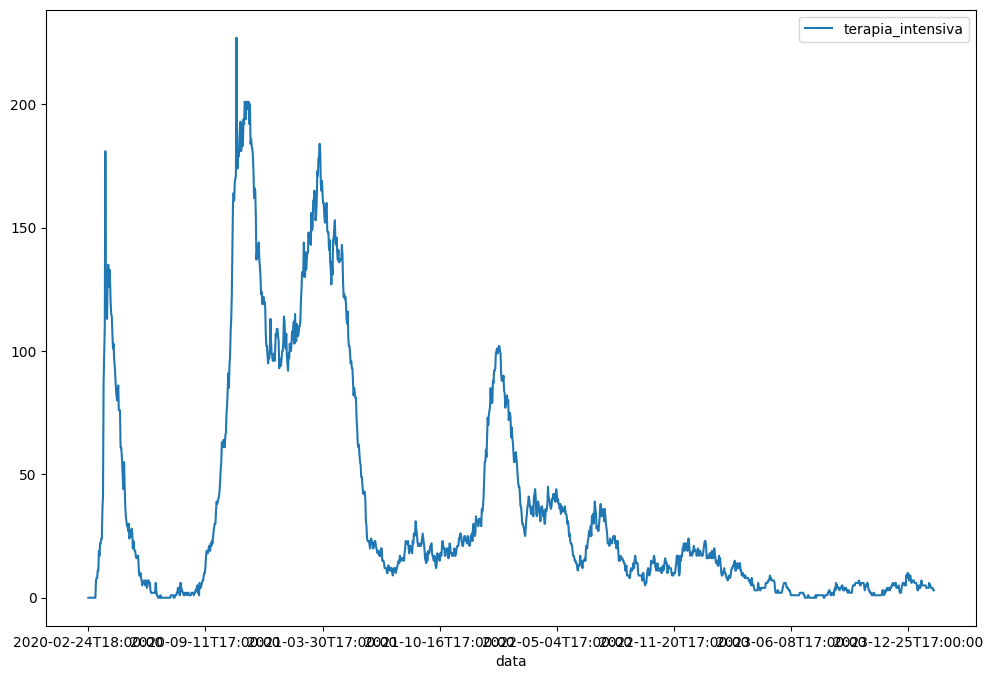

In [21]:
plt.figure()
ax = df_campania.plot(x='data',y='terapia_intensiva',figsize=(12,8))
plt.show()

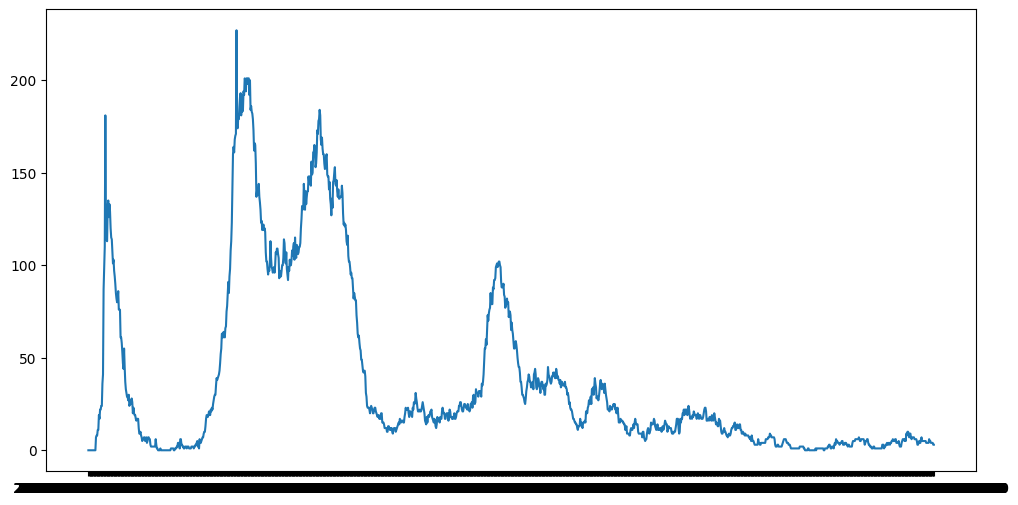

In [22]:
plt.figure(figsize=(12,6))
ax = plt.plot(df_campania['data'],df_campania['terapia_intensiva'])
plt.show()

Manipolazione delle date

In [23]:
df['data']

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
30340    2024-02-07T17:00:00
30341    2024-02-07T17:00:00
30342    2024-02-07T17:00:00
30343    2024-02-07T17:00:00
30344    2024-02-07T17:00:00
Name: data, Length: 30345, dtype: object

In [24]:
df['data_dt'] = pd.to_datetime(df['data'])

In [25]:
df[['data', 'data_dt']]

,data,data_dt
0,2020-02-24T18:00:00,2020-02-24 18:00:00
1,2020-02-24T18:00:00,2020-02-24 18:00:00
2,2020-02-24T18:00:00,2020-02-24 18:00:00
3,2020-02-24T18:00:00,2020-02-24 18:00:00
4,2020-02-24T18:00:00,2020-02-24 18:00:00
...,...,...
30340,2024-02-07T17:00:00,2024-02-07 17:00:00
30341,2024-02-07T17:00:00,2024-02-07 17:00:00
30342,2024-02-07T17:00:00,2024-02-07 17:00:00
30343,2024-02-07T17:00:00,2024-02-07 17:00:00


In [26]:
day_1 = df['data_dt'].min()

In [27]:
day_1

Timestamp('2020-02-24 18:00:00')

In [28]:
df['giorni'] = (df['data_dt'] - day_1).dt.days

In [29]:
df[['giorni', 'data_dt']]

,giorni,data_dt
0,0,2020-02-24 18:00:00
1,0,2020-02-24 18:00:00
2,0,2020-02-24 18:00:00
3,0,2020-02-24 18:00:00
4,0,2020-02-24 18:00:00
...,...,...
30340,1443,2024-02-07 17:00:00
30341,1443,2024-02-07 17:00:00
30342,1443,2024-02-07 17:00:00
30343,1443,2024-02-07 17:00:00


In [30]:
df_campania = df.loc[df1['denominazione_regione']=="Campania"]

In [31]:
df_campania[['giorni', 'data_dt']]

,giorni,data_dt
3,0,2020-02-24 18:00:00
24,1,2020-02-25 18:00:00
45,2,2020-02-26 18:00:00
66,3,2020-02-27 18:00:00
87,4,2020-02-28 18:00:00
...,...,...
30243,1439,2024-02-03 17:00:00
30264,1440,2024-02-04 17:00:00
30285,1441,2024-02-05 17:00:00
30306,1442,2024-02-06 17:00:00


In [32]:
df_regione = df.loc[(df['denominazione_regione']=='Piemonte') & (df['giorni']>204)].copy().reset_index(drop=True)

In [33]:
df_regione

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,data_dt,giorni
0,2020-09-17T17:00:00,ITA,1,Piemonte,45.073274,7.680687,136,6,142,2080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-17 17:00:00,205
1,2020-09-18T17:00:00,ITA,1,Piemonte,45.073274,7.680687,140,6,146,2116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-18 17:00:00,206
2,2020-09-19T17:00:00,ITA,1,Piemonte,45.073274,7.680687,140,6,146,2158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-19 17:00:00,207
3,2020-09-20T17:00:00,ITA,1,Piemonte,45.073274,7.680687,142,7,149,2177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-20 17:00:00,208
4,2020-09-21T17:00:00,ITA,1,Piemonte,45.073274,7.680687,143,7,150,2208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-21 17:00:00,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2024-02-03T17:00:00,ITA,1,Piemonte,45.073274,7.680687,101,2,103,55243,...,NaN,NaN,519833.0,1283755.0,5150741.0,17306253.0,ITC,ITC1,2024-02-03 17:00:00,1439
1235,2024-02-04T17:00:00,ITA,1,Piemonte,45.073274,7.680687,103,2,105,55214,...,NaN,NaN,519833.0,1283763.0,5150746.0,17307557.0,ITC,ITC1,2024-02-04 17:00:00,1440
1236,2024-02-05T17:00:00,ITA,1,Piemonte,45.073274,7.680687,100,2,102,55208,...,NaN,NaN,519833.0,1283769.0,5150754.0,17308296.0,ITC,ITC1,2024-02-05 17:00:00,1441
1237,2024-02-06T17:00:00,ITA,1,Piemonte,45.073274,7.680687,92,3,95,55153,...,NaN,NaN,519834.0,1283792.0,5150796.0,17311485.0,ITC,ITC1,2024-02-06 17:00:00,1442


<Axes: xlabel='giorni'>

<Figure size 1200x1000 with 0 Axes>

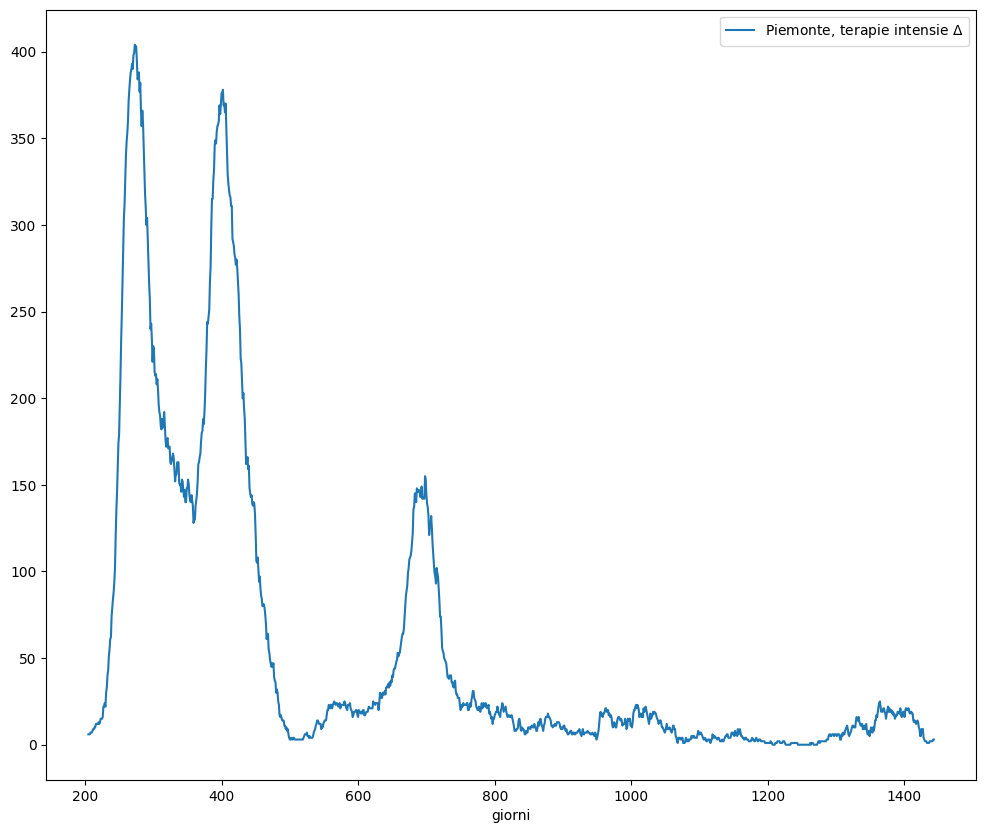

In [34]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
df_regione.plot(x='giorni', y='terapia_intensiva', ax=ax, figsize=(12,10), label='Piemonte, terapie intensie $\Delta$')
# In alternativa, è possibile passare direttamente le colonne del DataFramce a matplotlib:
#plt.plot(df_regione['giorni'],df_regione['terapia_intensiva'])

Per calcolare la differenza con ciascuno dei giorni precedenti basta fare lo *shift* della colonna e sottrarla alla colonna stessa:

In [35]:
df_regione['terapia_intensiva_gg']=df_regione['terapia_intensiva']-df_regione['terapia_intensiva'].shift(1)

Per fare lo stesso calcolo con un codice tradizionale che usa un loop, il codice diventa decisamente più involuto. <span style="color:blue;">Ogni volta che è possibile, conviene usare le funzioni di pandas perché sono più efficienti e richiedono meno linee di codice.</span>

In [36]:
import numpy as np
df_regione['terapia_intensiva_gg_loop'] = np.nan
prev = 0
i = 0 
for ti in df_regione['terapia_intensiva']:
    if i > 0: df_regione['terapia_intensiva_gg_loop'].at[i]=ti - prev
    prev = ti
    i += 1

In [37]:
df_regione[['terapia_intensiva', 'terapia_intensiva_gg', 'terapia_intensiva_gg_loop']]

,terapia_intensiva,terapia_intensiva_gg,terapia_intensiva_gg_loop
0,6,NaN,NaN
1,6,0.0,0.0
2,6,0.0,0.0
3,7,1.0,1.0
4,7,0.0,0.0
...,...,...,...
1234,2,0.0,0.0
1235,2,0.0,0.0
1236,2,0.0,0.0
1237,3,1.0,1.0


Per il calcolo della **media mobile**, è possibile usare la funzione [```rolling```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) che raggruppa gli ultimi valori per poter calcolare semplici indicatori statistici (somma, media, ecc.). Esistono opzioni per dare un peso ai diversi valori per usi molto particolari.

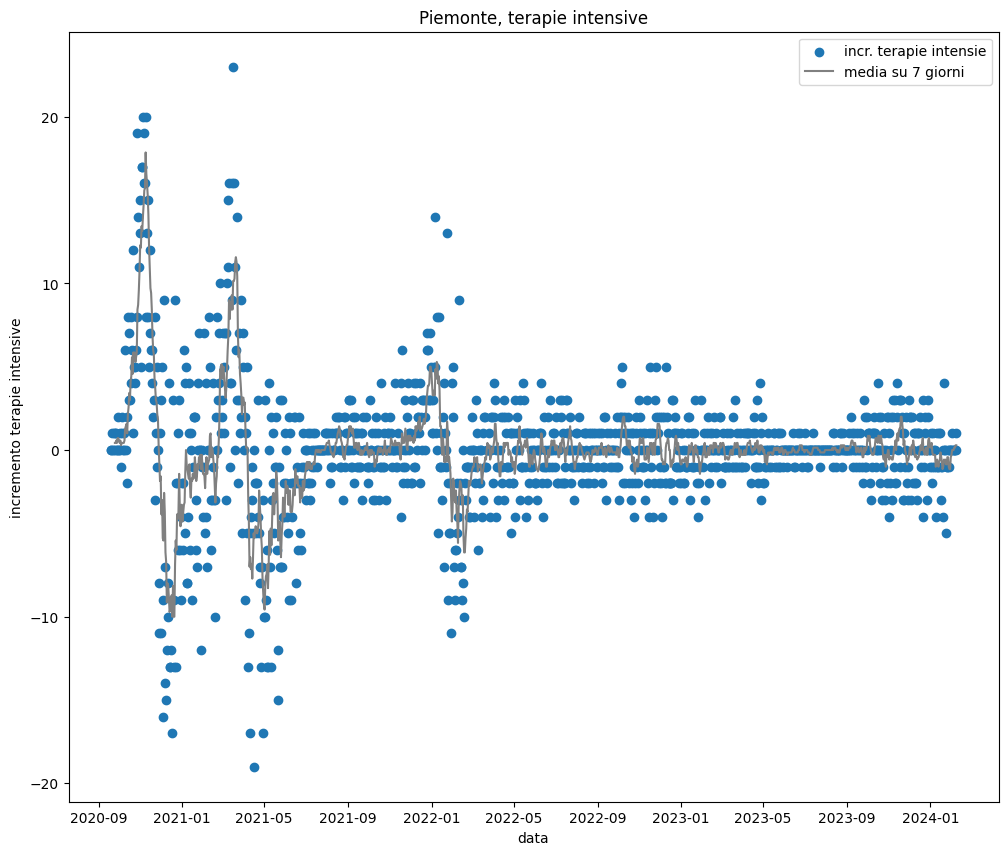

In [38]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(x=df_regione.data_dt, y=df_regione.terapia_intensiva_gg, label='incr. terapie intensie')
ax.plot(df_regione.data_dt, df_regione.terapia_intensiva_gg.rolling(window=7).mean(), color='gray', label='media su 7 giorni')
ax.set_title('Piemonte, terapie intensive')
ax.set_xlabel('data')
ax.set_ylabel('incremento terapie intensive')
ax.legend()

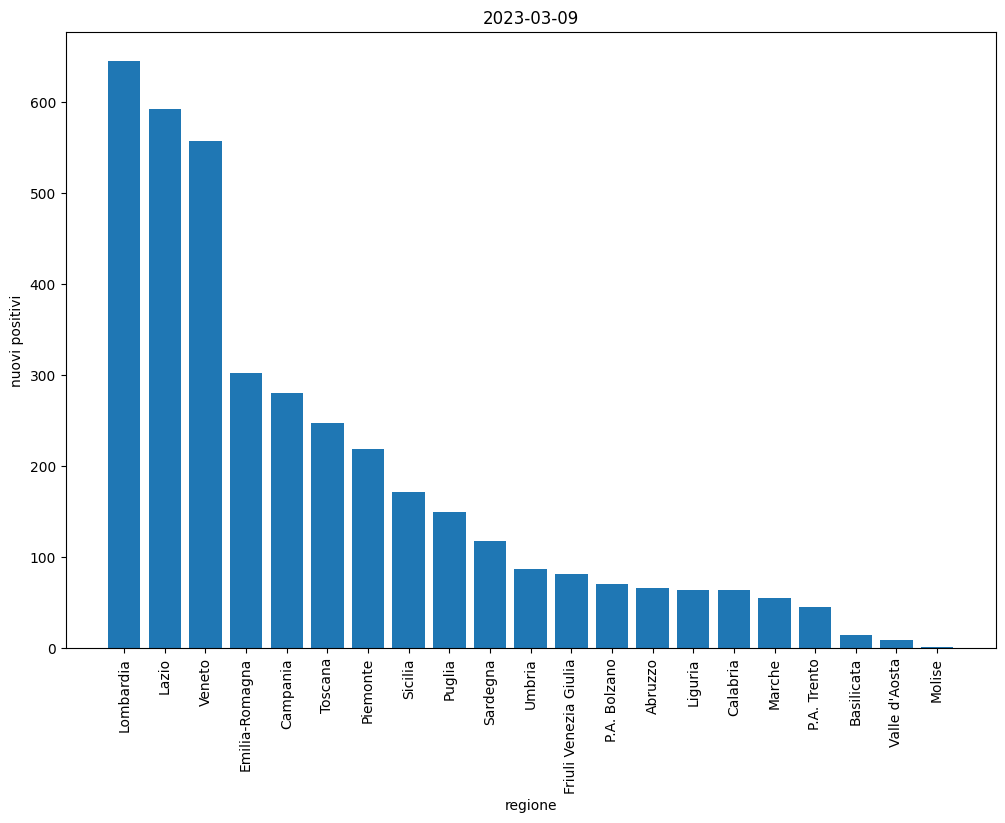

In [39]:
df_today=df[df['data']=='2023-03-09T17:00:00'].copy().reset_index(drop=True)
df_today=df_today.sort_values(by=['nuovi_positivi'], ascending=False)
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(df_today['denominazione_regione'], df_today['nuovi_positivi'])
ax.set_xlabel('regione')
ax.set_ylabel('nuovi positivi')
plt.title('2023-03-09')
plt.xticks(rotation='vertical')
plt.show()

# Spunti per esercizi

* usando lo stesso dataframe del Dipartimento della Protezione Civile, fare grafici delle seguenti quantità:
    * totale positivi in Campania (o una regione che preferite) in funzione della data
    * positivi giornalieri in Campania in funzione della data
    * media mobile a 7 giorni dei positivi giornalieri in Campania in funzione della data
    * distribuzione del numero di decessi totale per regione ad oggi
    * distribuzione del numero di positivi giornalieri rispetto al numero di tamponi fatti in funzione della data
    * ...

* creare un data frame con la propria agenda telefonica.

*Hint* usare tutorial e guide in rete su come creare un DataFrame da zero. Ad esempio [questo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

* creare un data frame con i risultati del calendario di serie A e da questo determinare la classifica.

*Hint*: alcuni dati si possono trovare [qui](https://www.kaggle.com/massibelloni/serie-a-19932017) oppure [qui](https://www.football-data.co.uk/italym.php) in formato CSV. Il significato degli acronimi si trova [qui](https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html).

* Variazione sul tema: creare un data frame con il numero di rigori per stagione di ciascuna squadra e graficare l'andamento negli anni

*Hint*: le statistiche sui rigori ricevuti si trovano su <a href="https://www.transfermarkt.it/serie-a/topErhalteneElfmeter/wettbewerb/IT1/plus/?saison_id=2018">transfermarkt</a>. Ma non sono scaricabili in CSV. <a href="https://www.kaggle.com/emilerichard/penalty-statistics-20192020">qui</a> c'è il file per il 2019-2020.

Altri esempi di dataset si possono trovare nei seguenti repositories:
* <a href="https://datasetsearch.research.google.com/">Google dataset search</a>
* <a href="https://www.kaggle.com/">Kaggle</a>
* <a href="https://archive.ics.uci.edu/ml/index.php">Machine learning repository</a>
* <a href="https://datahub.io/">DataHub</a>
* <a href="https://data.humdata.org/dataset">HDX</a>

<span style="color: gray">Si ringrazia G. Bonifazi per le fonti citate sopra.</span>